In [1]:
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
data = pd.read_excel("BASE.xlsx",sheet_name=4)
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,TIPO,REF,Etapa,Sección,ACCT,NaN,BUDGET,NaN,ALL,NaN,Costo
1,Above the Line,Cuenta General,NaN,NaN,1100,NaN,10065000,NaN,DEVELOPMENT,NaN,Balance
2,Above the Line,Sub cuenta,NaN,NaN,1101,NaN,8340000,NaN,ALL SHOW,NaN,Petty Cash
3,Above the Line,Detalle,NaN,NaN,1101-002,NaN,0,NaN,SOFT,NaN,NaN
4,Above the Line,Detalle,NaN,NaN,1101-004,NaN,0,NaN,PREP,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2474,Others,Detalle,NaN,NaN,7230-001,NaN,0,NaN,NaN,NaN,NaN
2475,Others,Detalle,NaN,NaN,7230-002,NaN,0,NaN,NaN,NaN,NaN
2476,Others,Detalle,NaN,NaN,7230-003,NaN,0,NaN,NaN,NaN,NaN
2477,Others,Detalle,NaN,NaN,7230-004,NaN,0,NaN,NaN,NaN,NaN


In [5]:
    data = pd.read_excel('BASE.xlsx', sheet_name='Budget', header=None)
data.columns = data.iloc[1]  
data = data.drop([0, 1])  
data.head()

1,TIPO,REF,Etapa,Sección,ACCT,NaN,BUDGET,NaN,ALL,NaN,Costo
2,Above the Line,Cuenta General,NaN,NaN,1100,NaN,10065000,NaN,DEVELOPMENT,NaN,Balance
3,Above the Line,Sub cuenta,NaN,NaN,1101,NaN,8340000,NaN,ALL SHOW,NaN,Petty Cash
4,Above the Line,Detalle,NaN,NaN,1101-002,NaN,0,NaN,SOFT,NaN,NaN
5,Above the Line,Detalle,NaN,NaN,1101-004,NaN,0,NaN,PREP,NaN,NaN
6,Above the Line,Detalle,DEVELOPMENT,NaN,1101-005,NaN,1400000,NaN,SHOOT,NaN,NaN


In [7]:
data.tail()

1,TIPO,REF,Etapa,Sección,ACCT,NaN,BUDGET,NaN,ALL,NaN,Costo
2475,Others,Detalle,NaN,NaN,7230-001,NaN,0,NaN,NaN,NaN,NaN
2476,Others,Detalle,NaN,NaN,7230-002,NaN,0,NaN,NaN,NaN,NaN
2477,Others,Detalle,NaN,NaN,7230-003,NaN,0,NaN,NaN,NaN,NaN
2478,Others,Detalle,NaN,NaN,7230-004,NaN,0,NaN,NaN,NaN,NaN
2479,Others,Detalle,NaN,NaN,7230-005,NaN,0,NaN,NaN,NaN,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 2 to 2479
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TIPO     2478 non-null   object 
 1   REF      2478 non-null   object 
 2   Etapa    1563 non-null   object 
 3   Sección  0 non-null      object 
 4   ACCT     2478 non-null   object 
 5   nan      0 non-null      float64
 6   BUDGET   2455 non-null   object 
 7   nan      20 non-null     float64
 8   ALL      34 non-null     object 
 9   nan      0 non-null      float64
 10  Costo    2 non-null      object 
dtypes: float64(3), object(8)
memory usage: 213.1+ KB


In [11]:
print(data.columns)

Index([   'TIPO',     'REF',   'Etapa', 'Sección',    'ACCT',       nan,
        'BUDGET',       nan,     'ALL',       nan,   'Costo'],
      dtype='object', name=1)


In [13]:
cuentas_generales = data[data["REF"] == "Cuenta General"]
codigos_cuentas_generales = cuentas_generales["ACCT"].unique().tolist()
print(codigos_cuentas_generales)


['1100', '1200', '1300', '1400', '1600', '2000', '2100', '2200', '2300', '2400', '2500', '2600', '2700', '2800', '2900', '3000', '3100', '3200', '3300', '3400', '3500', '3600', '3700', '3800', '3900', '4100', '5000', '5100', '5200', '5300', '5400', '6000', '6100', '7000', '7200']


In [15]:
cuentas_generales = data[data["REF"] == "Cuenta General"]
presupuestos_por_cuenta = cuentas_generales.groupby("ACCT")["BUDGET"].sum().sort_values(ascending=False)
presupuestos_por_cuenta

ACCT
3400       15001515
7000       13503510
1400    11960556.03
3100       11484172
1100       10065000
1200        9449620
3600        7591103
2000        6668300
3900     5965292.85
2400        5268025
5000        4891351
6000        3833200
2700        2972500
1300     2810543.88
5100        2206500
5200        1843600
2200        1825740
3000        1624362
2100        1614000
7200        1485676
6100        1452334
4100        1451938
2300        1427550
1600     1416166.53
2800        1208200
3200        1139000
2600        1115250
2500        1009000
3700         810000
3800         747019
2900         630387
3500         281000
3300         165500
5400         100000
5300          80000
Name: BUDGET, dtype: object

In [104]:
#data.columns = data.columns.str.strip()
#data = data.dropna(axis=1, how="all")         # columnas vacías
#data = data.dropna(how="all")                 # filas vacías
#data = data.drop_duplicates()                 # filas duplicadas
#data["BUDGET"] = pd.to_numeric(data["BUDGET"], errors="coerce")
#data = data[data["BUDGET"].notna()]
#data = data[data["ACCT"].notna()]
#data["REF"] = data["REF"].str.strip().str.lower()
#subcuentas = data[data["REF"] == "sub cuenta"]
#data = data[data["BUDGET"] > 0]

In [17]:
# Eliminar columnas innecesarias
columnas_a_eliminar = ["Unnamed: 3", "Unnamed: 5", "Unnamed: 7", "Unnamed: 9", "Unnamed: 8", "Unnamed: 10"]
data = data.drop(columns=columnas_a_eliminar, errors="ignore")


In [23]:
data.head()

1,TIPO,REF,Etapa,Sección,ACCT,NaN,BUDGET,NaN,ALL,NaN,Costo
2,Above the Line,Cuenta General,NaN,NaN,1100,NaN,10065000,NaN,DEVELOPMENT,NaN,Balance
3,Above the Line,Sub cuenta,NaN,NaN,1101,NaN,8340000,NaN,ALL SHOW,NaN,Petty Cash
4,Above the Line,Detalle,NaN,NaN,1101-002,NaN,0,NaN,SOFT,NaN,NaN
5,Above the Line,Detalle,NaN,NaN,1101-004,NaN,0,NaN,PREP,NaN,NaN
6,Above the Line,Detalle,DEVELOPMENT,NaN,1101-005,NaN,1400000,NaN,SHOOT,NaN,NaN


In [25]:
data.tail()

1,TIPO,REF,Etapa,Sección,ACCT,NaN,BUDGET,NaN,ALL,NaN,Costo
2475,Others,Detalle,NaN,NaN,7230-001,NaN,0,NaN,NaN,NaN,NaN
2476,Others,Detalle,NaN,NaN,7230-002,NaN,0,NaN,NaN,NaN,NaN
2477,Others,Detalle,NaN,NaN,7230-003,NaN,0,NaN,NaN,NaN,NaN
2478,Others,Detalle,NaN,NaN,7230-004,NaN,0,NaN,NaN,NaN,NaN
2479,Others,Detalle,NaN,NaN,7230-005,NaN,0,NaN,NaN,NaN,NaN


In [21]:
data

1,TIPO,REF,Etapa,Sección,ACCT,NaN,BUDGET,NaN,ALL,NaN,Costo
2,Above the Line,Cuenta General,NaN,NaN,1100,NaN,10065000,NaN,DEVELOPMENT,NaN,Balance
3,Above the Line,Sub cuenta,NaN,NaN,1101,NaN,8340000,NaN,ALL SHOW,NaN,Petty Cash
4,Above the Line,Detalle,NaN,NaN,1101-002,NaN,0,NaN,SOFT,NaN,NaN
5,Above the Line,Detalle,NaN,NaN,1101-004,NaN,0,NaN,PREP,NaN,NaN
6,Above the Line,Detalle,DEVELOPMENT,NaN,1101-005,NaN,1400000,NaN,SHOOT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2475,Others,Detalle,NaN,NaN,7230-001,NaN,0,NaN,NaN,NaN,NaN
2476,Others,Detalle,NaN,NaN,7230-002,NaN,0,NaN,NaN,NaN,NaN
2477,Others,Detalle,NaN,NaN,7230-003,NaN,0,NaN,NaN,NaN,NaN
2478,Others,Detalle,NaN,NaN,7230-004,NaN,0,NaN,NaN,NaN,NaN


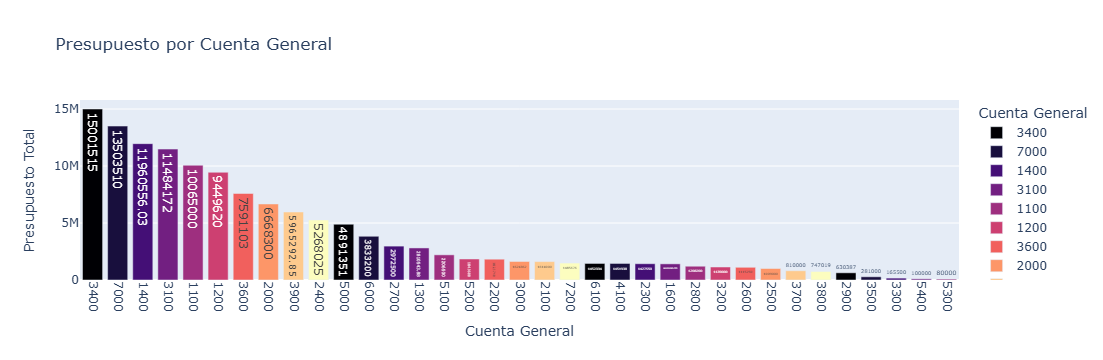

In [49]:
data = presupuestos_por_cuenta.reset_index()
data.columns = ["Cuenta General", "Presupuesto"]
fig = px.bar(
    data,
    x="Cuenta General",
    y="Presupuesto",
    title="Presupuesto por Cuenta General",
    labels={"Cuenta General": "Cuenta General", "Presupuesto": "Presupuesto Total"},
    text="Presupuesto",
    color="Cuenta General",
    color_discrete_sequence=px.colors.sequential.Magma
)

fig.update_layout(xaxis_tickangle=90)
fig.show()


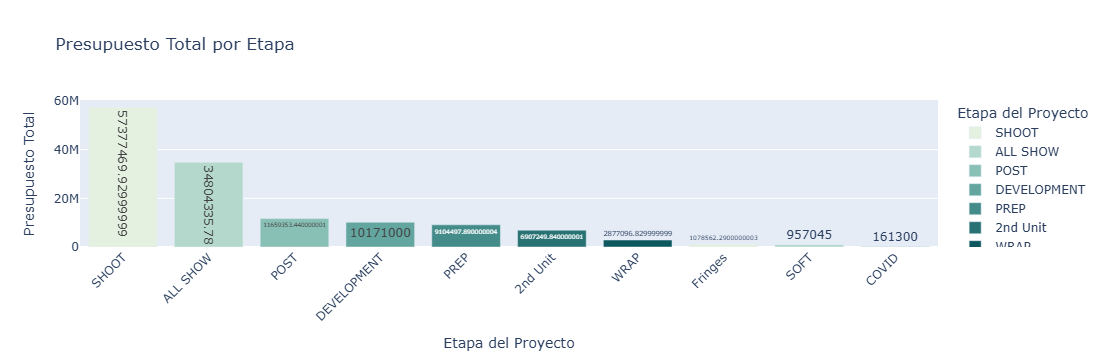

In [29]:
etapas = data[data["Etapa"].notna()]
presupuesto_etapas = etapas.groupby("Etapa")["BUDGET"].sum().sort_values(ascending=False)
df_etapas = presupuesto_etapas.reset_index()
df_etapas.columns = ["Etapa", "Presupuesto"]
fig = px.bar(
    df_etapas,
    x="Etapa",
    y="Presupuesto",
    title="Presupuesto Total por Etapa",
    labels={"Etapa": "Etapa del Proyecto", "Presupuesto": "Presupuesto Total"},
    text="Presupuesto",
    color="Etapa",
    color_discrete_sequence=px.colors.sequential.Mint
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()


In [39]:
data["REF"] = data["REF"].astype(str).str.strip()
subcuentas = data[data["REF"] == "Sub cuenta"]

if subcuentas.empty:
    print("No se encontraron subcuentas con ese nombre exacto.")
else:
    top_subcuentas = subcuentas.groupby("ACCT")["BUDGET"].sum().sort_values(ascending=False).head(10)
    print("Top 10 subcuentas con mayor presupuesto:")
    print(top_subcuentas)


Top 10 subcuentas con mayor presupuesto:
ACCT
7003    11643574
1101     8340000
1401     7612289
3193     7120297
3412     6880105
1201     5979120
3683     5456700
3410     4701050
3902     4360556
2494     3001630
Name: BUDGET, dtype: object


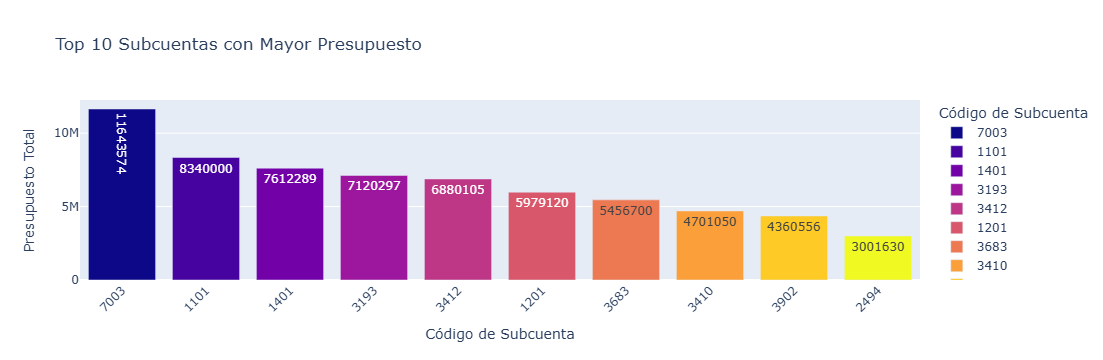

In [41]:
import plotly.express as px

if not subcuentas.empty:
    top_subcuentas = subcuentas.groupby("ACCT")["BUDGET"].sum().sort_values(ascending=False).head(10)
    df_top = top_subcuentas.reset_index()
    df_top.columns = ["Subcuenta", "Presupuesto"]
    
    fig = px.bar(
        df_top,
        x="Subcuenta",
        y="Presupuesto",
        title="Top 10 Subcuentas con Mayor Presupuesto",
        labels={"Subcuenta": "Código de Subcuenta", "Presupuesto": "Presupuesto Total"},
        text="Presupuesto",
        color="Subcuenta",
        color_discrete_sequence=px.colors.sequential.Plasma
    )

    fig.update_layout(xaxis_tickangle=-45)
    fig.show()
else:
    print("No se encontraron subcuentas con ese nombre exacto.")

